f(x) = -12x^4*sin(cos(x)) - 18x^3+5x^2 + 10x - 30

1. Определить корни
2. Найти интервалы, на которых функция возрастает
3. Найти интервалы, на которых функция убывает
4. Построить график
5. Вычислить вершину
6. Определить промежутки, на котором f > 0
7. Определить промежутки, на котором f < 0

In [5]:
from sympy import symbols, sin, cos
from sympy.plotting import plot
from scipy.optimize import fsolve
from scipy import misc
import matplotlib.pyplot as plt
import numpy

x = symbols('x')
eq = -12*(x**4)*sin(cos(x)) - 18*(x**3)+5*(x**2)+10*x-30

def eq_func(x):
    return -12*(x**4)*numpy.sin(numpy.cos(x)) - 18*(x**3)+5*(x**2)+10*x-30
def eq_func_derivate(x):
    return misc.derivative(eq_func,x,dx=1e-4)

print(f'Уравнение:\n{eq} = 0')

Уравнение:
-12*x**4*sin(cos(x)) - 18*x**3 + 5*x**2 + 10*x - 30 = 0


In [6]:
def solution(f,root_interval):
    '''
    Возвращает массив корней уравнения на указанном интервале
    '''
    leftnum = root_interval[0]
    rightnum = root_interval[1]
    temp = leftnum
    roots = []
    # interval = []
    x_step = 0.5
    while temp < rightnum:
        if f(temp) >= 0 and f(temp + x_step) <= 0:
            w = fsolve(f, temp)
            roots.append(*w)
        if f(temp) <= 0 and f(temp + x_step) >= 0:
            w = fsolve(f, temp)
            roots.append(*w)
        # if f(temp) > f(temp + 1) < f(temp + 2):
        #     interval.append(temp + 1)
        temp += x_step
    roots = [round(i, 2) for i in roots]
    # print(f'Корни уравнения для заданного интервала: {roots}')
    return roots

def get_sign_intervals(eq_func,interval):
    '''Найти промежутки на которых f>0 и f<0 в заданной области interval'''
    roots = solution(eq_func,interval)
    zero_points = [interval[0], *roots, interval[1]]
    sign_intervals = []
    # print(zero_points)
    for i in range(len(zero_points)-1):
        x_val = (zero_points[i]+zero_points[i+1])*0.5
        func_val = eq_func(x_val)
        sign =  '+' if func_val>0 else '-'
        sign_intervals.append([
            zero_points[i],zero_points[i+1],sign
            ])
    return(sign_intervals)


In [7]:
root_interval = list(map(int,input('Задайте через пробел интервал поиска решений').split(' ')))
roots = solution(eq_func,root_interval)
roots_derivative = solution(eq_func_derivate,root_interval)
sign_intervals = get_sign_intervals(eq_func,root_interval)
sign_derivative_intervals = get_sign_intervals(eq_func_derivate,root_interval)    

1. Корни уравнения для интервала [-8, 8]: 
 [-7.65, -5.03, -1.34, 2.27, 4.38]
[-6.83, -4.17, -0.39, -0.39, 1.7, 3.82, 7.0]

2. f растет на интервалах: 
[-6.83, -4.17, '+']
[-0.39, -0.39, '+']
[1.7, 3.82, '+']
[7.0, 8, '+']

3. f убывает на интервалах: 
[-8, -6.83, '-']
[-4.17, -0.39, '-']
[-0.39, 1.7, '-']
[3.82, 7.0, '-']

4. график функции на интервале [-8, 8] 

5.Координаты вершин:
-6.83,-13820.51
-4.17,3111.347
-0.39,-32.293
-0.39,-32.293
1.7,-74.106
3.82,872.255
7.0,-25610.491

6. f>0 на интервалах: 
[-8, -7.65, '+']
[-5.03, -1.34, '+']
[2.27, 4.38, '+']

7. f<0 на интервалах: 
[-7.65, -5.03, '-']
[-1.34, 2.27, '-']
[4.38, 8, '-']


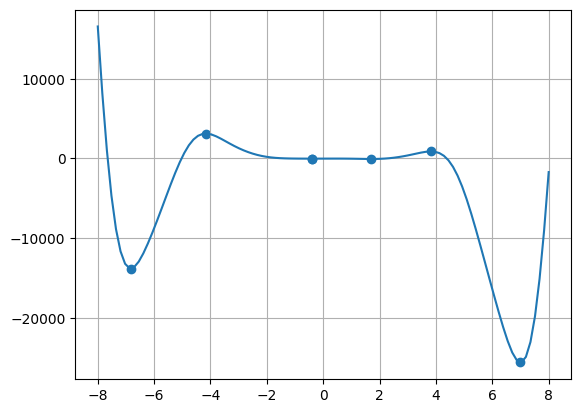

In [8]:
print(f'1. Корни уравнения для интервала {root_interval}: \n {roots}')
print(roots_derivative)
print('\n2. f растет на интервалах: ')
for sign_interval in sign_derivative_intervals:
    if sign_interval[2] == '+':
        print(sign_interval)
print('\n3. f убывает на интервалах: ')
for sign_interval in sign_derivative_intervals:
    if sign_interval[2] == '-':
        print(sign_interval)

x_arr = numpy.linspace(root_interval[0],root_interval[1],100)
print(f'\n4. график функции на интервале {root_interval} ')

plt.grid()
plt.plot(x_arr,[eq_func(x) for x in x_arr ])
# plt.plot(x_arr,[eq_func_derivate(x) for x in x_arr ])
plt.scatter(roots_derivative,[eq_func(root) for root in roots_derivative ])
print('\n5.Координаты вершин:')
for root in roots_derivative:
    print(f'{root},{round(eq_func(root),3)}')

print('\n6. f>0 на интервалах: ')
for sign_interval in sign_intervals:
    if sign_interval[2] == '+':
        print(sign_interval)
print('\n7. f<0 на интервалах: ')
for sign_interval in sign_intervals:
    if sign_interval[2] == '-':
        print(sign_interval)
